## Notebook: Running UTOPIA Model Step by Step

### Import the necessary libraries and the UTOPIA class.

In [1]:
from utopia.utopia import utopiaModel

#### Step 1: Load Configuration and Data Files

In [2]:

# Load the default configuration and data from the 'data' folder.
data_data = utopiaModel.load_json_file("data/default_data.json")
config_data = utopiaModel.load_json_file("data/default_config.json")


In [3]:

# Display the loaded config and data to ensure they were loaded correctly.
print("Loaded Configuration Data:", config_data)
print("Loaded Input Data:", data_data)


Loaded Configuration Data: {'big_bin_diameter_um': 5000, 'N_sizeBins': 5, 'vol_algal_cell_m3': 2e-16, 'spm_density_kg_m3': 1388, 'boxName': 'Utopia', 'comp_input_file_name': 'inputs_compartments.csv', 'comp_interactFile_name': 'compartment_interactions.csv', 'MPforms_list': ['freeMP', 'heterMP', 'biofMP', 'heterBiofMP'], 'solver': 'SteadyState', 'compartment_types': {'UTOPIA_surfaceSea_water_compartments': ['Ocean_Surface_Water', 'Coast_Surface_Water'], 'UTOPIA_water_compartments': ['Ocean_Mixed_Water', 'Ocean_Column_Water', 'Coast_Column_Water', 'Surface_Freshwater', 'Bulk_Freshwater'], 'UTOPIA_deep_soil_compartments': ['Beaches_Deep_Soil', 'Background_Soil', 'Impacted_Soil'], 'UTOPIA_soil_surface_compartments': ['Beaches_Soil_Surface', 'Background_Soil_Surface', 'Impacted_Soil_Surface'], 'UTOPIA_sediment_compartment': ['Sediment_Freshwater', 'Sediment_Ocean', 'Sediment_Coast'], 'UTOPIA_air_compartments': ['Air']}}
Loaded Input Data: {'MPdensity_kg_m3': 980, 'MP_composition': 'PE', 's


#### Step 2: Initialize the UTOPIA Model with the Loaded Data

In [4]:

# We now initialize the model by passing the loaded data into the UTOPIA class.
model = utopiaModel(config=config_data, data=data_data)


In [5]:
model.summarize()

Model: UTOPIA
Microplastic Density (kg/m3): 980
MP shape:  fiber
Emissions made to MP form:  freeMP
Fragmentation style: Mixed (F = 0.5)
Fragmetation timescale (days):  36.5
Discorporation timescale (days):  4584
Emissions to Ocean_Surface_Water for size fraction 5000.0 µm: 100 g/s


#### Step 3: Running the Model


In [6]:
model.run()  # Run the model to estimate steady state solution for the system.

Double check the properties of the particles included in the model (dimensions, density and volumes after generated the heteroaggregated and biofouled species)

In [7]:
model.particles_df

,Name,form,shape,composition,density_kg_m3,dimensionX_um,dimensionY_um,dimensionZ_um
0,mp1,freeMP,fiber,PE,980,0.05,0.5,0.05
1,mp2,freeMP,fiber,PE,980,0.50,5.0,0.50
2,mp3,freeMP,fiber,PE,980,5.00,50.0,5.00
3,mp4,freeMP,fiber,PE,980,50.00,500.0,50.00
4,mp5,freeMP,fiber,PE,980,500.00,5000.0,500.00


In [8]:
model.particles_properties_df

,Particle,Radius_m,Volume_m3,Density_kg_m3,Corey Shape Factor
0,mp1,6.165530e-08,3.926991e-21,980.000000,0.316228
1,mp2,6.165530e-07,3.926991e-18,980.000000,0.316228
2,mp3,6.165530e-06,3.926991e-15,980.000000,0.316228
3,mp4,6.165530e-05,3.926991e-12,980.000000,0.316228
4,mp5,6.165530e-04,3.926991e-09,980.000000,0.316228
5,mp1_BF,7.317319e-06,9.999329e-15,1387.999756,0.984897
6,mp2_BF,7.872216e-06,1.381258e-14,1387.803989,0.877134
7,mp3_BF,1.342119e-05,7.715418e-14,1348.445306,0.549953
8,mp4_BF,6.891097e-05,6.726928e-12,1095.782346,0.354096
9,mp5_BF,6.238087e-04,4.170310e-09,994.071680,0.320319


Double check the model mass balance

In [9]:
from utopia.results_processing.mass_balance_check import*
massBalance(model)

Difference inflow-outflow = 2.1685764295398258e-11


'2.1685764295398258e-11'


#### Step 4: Output and Results


In [10]:
from utopia.results_processing.process_results import*
# Process results
processor = ResultsProcessor(model)  # Pass model with results


#### Process rate constants

Comparison of rate constant values distributions included in the model run

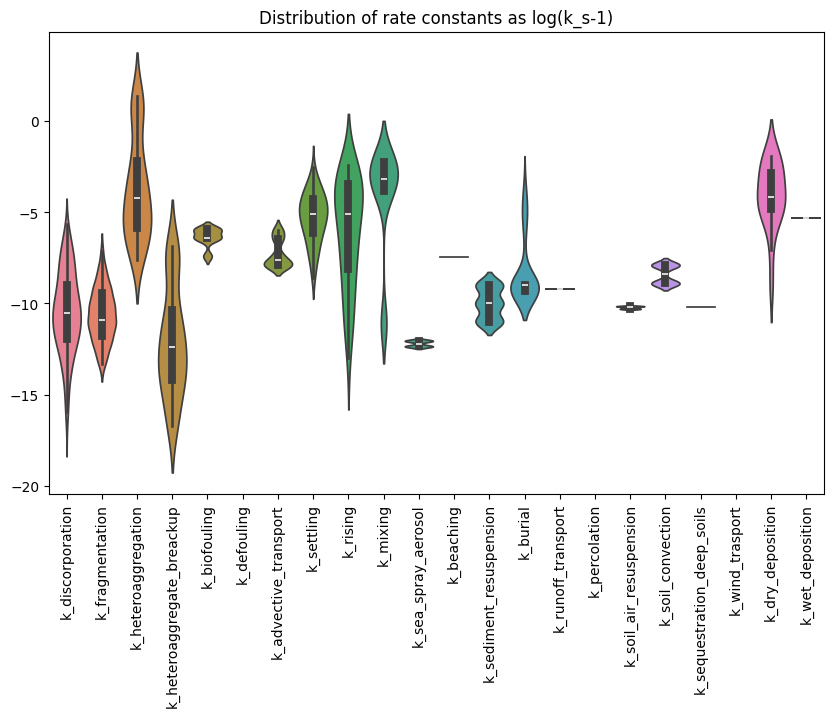

,Compartment,MP_form,Size_Bin,k_discorporation,k_fragmentation,k_heteroaggregation,k_heteroaggregate_breackup,k_biofouling,k_defouling,k_advective_transport,...,k_sediment_resuspension,k_burial,k_runoff_transport,k_percolation,k_soil_air_resuspension,k_soil_convection,k_sequestration_deep_soils,k_wind_trasport,k_dry_deposition,k_wet_deposition
0,Ocean_Surface_Water,freeMP,mp1,1.064457e-14,"[0.0, 0.0, 0.0, 0.0, 0.0]",2.453305e-08,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ocean_Surface_Water,freeMP,mp2,1.064457e-12,"[7.820307186486783e-11, 0.0, 0.0, 0.0, 0.0]",2.618704e-08,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ocean_Surface_Water,freeMP,mp3,1.064457e-10,"[3.9101535932433915e-10, 3.9101535932433915e-1...",2.034740e-07,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ocean_Surface_Water,freeMP,mp4,1.064457e-08,"[4.6921843118920696e-09, 1.5640614372973566e-0...",2.076159e-04,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ocean_Surface_Water,freeMP,mp5,1.064457e-06,"[5.4742150305407466e-08, 1.1730460779730172e-0...",1.718704e+00,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Air,heterBiofMP,mp1,1.013614e-13,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[3.910301530875131e-05, 3.2146037124985746e-06...","[3.2552650689905588e-06, 2.6761074800290486e-0..."
336,Air,heterBiofMP,mp2,1.252670e-13,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[4.8318581302933985e-05, 3.972202389320954e-06...","[3.2552650689905588e-06, 2.6761074800290486e-0..."
337,Air,heterBiofMP,mp3,3.912736e-13,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[0.00014665091481996507, 1.2055964776610627e-0...","[3.2552650689905588e-06, 2.6761074800290486e-0..."
338,Air,heterBiofMP,mp4,7.680293e-12,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[0.001246912656690792, 0.00010250693005924304,...","[3.2552650689905588e-06, 2.6761074800290486e-0..."


<Figure size 640x480 with 0 Axes>

In [11]:
processor.create_rateConstants_table()
processor.plot_rateConstants()
processor.RC_df


#### General results: Heatmaps of mass and particle number distribution

c:\Users\XiaoyuZhang\AppData\Local\anaconda3\envs\UTOPIA_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


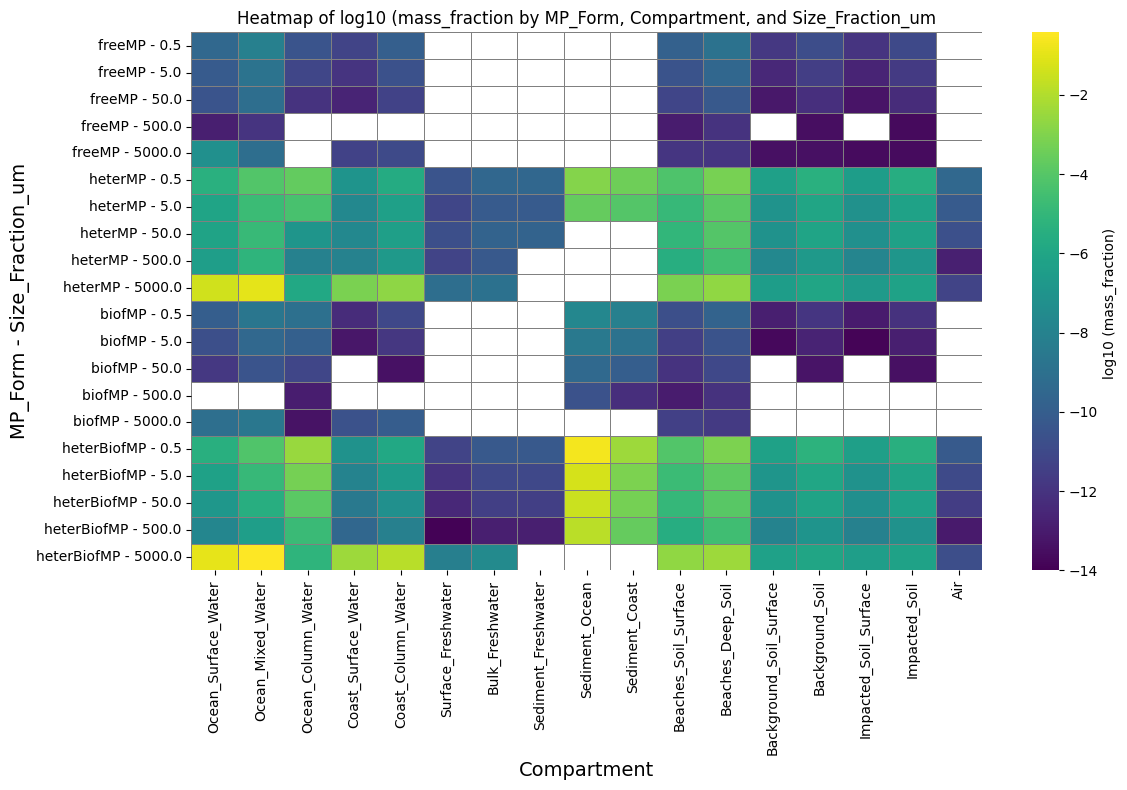

c:\Users\XiaoyuZhang\AppData\Local\anaconda3\envs\UTOPIA_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


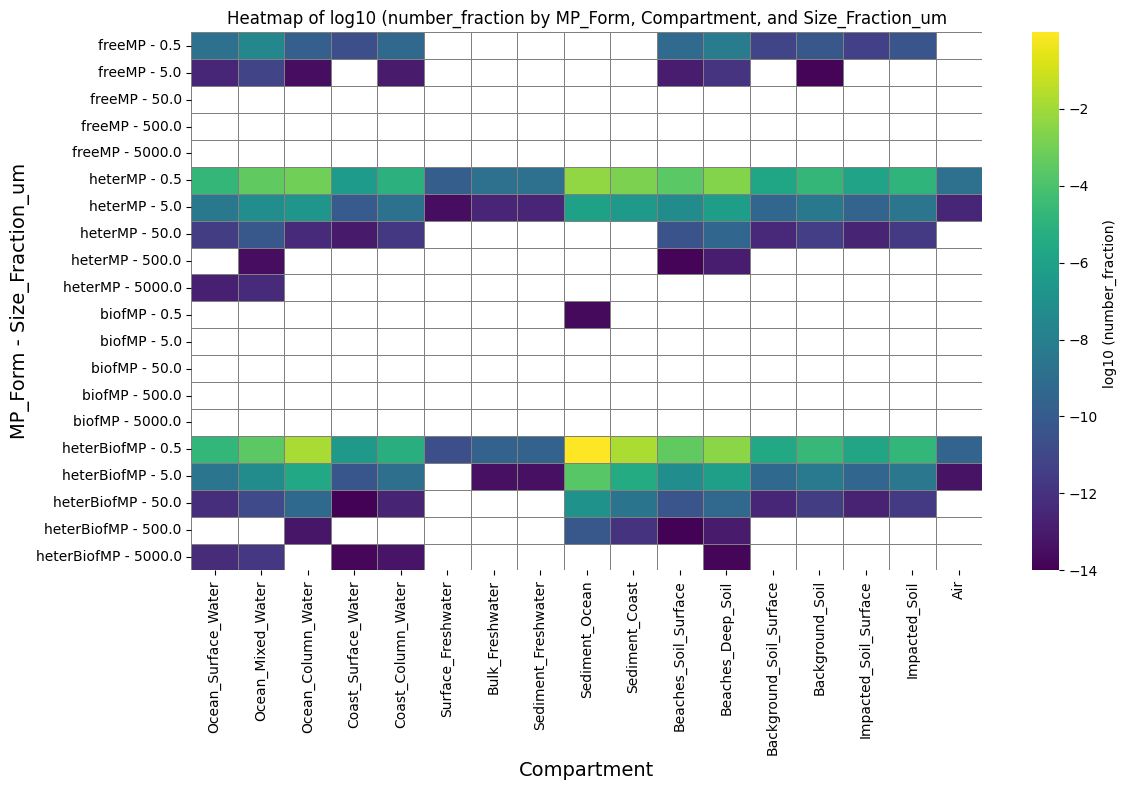

In [12]:
processor.estimate_flows()
processor.generate_flows_dict()
processor.process_results()
for fraction in ["mass_fraction", "number_fraction"]:
    processor.plot_fractionDistribution_heatmaps(fraction)


In [13]:
processor.Results_extended

,Compartment,MP_Form,Size_Fraction_um,mass_g,number_of_particles,concentration_g_m3,concentration_num_m3,mass_fraction,number_fraction,inflows_g_s,inflows_num_s,outflows_g_s,outflows_num_s,Total_inflows_g_s,Total_outflows_g_s,Total_inflows_num_s,Total_outflows_num_s
species,,,,,,,,,,,,,,,,,
aA0_Utopia,Ocean_Surface_Water,freeMP,0.5,0.334308,8.686812e+13,2.050967e-16,5.329332e-02,3.475596e-10,1.480911e-09,"{'k_fragmentation': 3.1938922913281098e-06, 'k...","{'k_fragmentation': 1.4545313550004404, 'k_het...","{'k_discorporation': 3.5585601857477225e-15, '...","{'k_discorporation': 0.9246733777171644, 'k_fr...",9.230981e-04,9.230981e-04,2.390323e+11,2.398623e+11
bA0_Utopia,Ocean_Surface_Water,freeMP,5.0,0.071367,1.854439e+10,4.378355e-17,1.137693e-05,7.419619e-11,3.161413e-13,"{'k_fragmentation': 6.844148657570532e-07, 'k_...","{'k_fragmentation': 0.0036505660431824143, 'k_...","{'k_discorporation': 7.596727834868893e-14, 'k...","{'k_discorporation': 0.019739702632541645, 'k_...",1.970609e-04,1.970609e-04,5.102740e+07,5.120524e+07
cA0_Utopia,Ocean_Surface_Water,freeMP,50.0,0.034179,8.881178e+06,2.096858e-17,5.448575e-09,3.553362e-11,1.514046e-16,"{'k_fragmentation': 4.5626773297465294e-07, 'k...","{'k_fragmentation': 0.00011860974725477935, 'k...","{'k_discorporation': 3.638182446306639e-12, 'k...","{'k_discorporation': 0.0009453628084895768, 'k...",9.438138e-05,9.438138e-05,2.440595e+04,2.452451e+04
dA0_Utopia,Ocean_Surface_Water,freeMP,500.0,0.000125,3.260622e+01,7.698370e-20,2.000381e-14,1.304576e-13,5.558646e-22,"{'k_fragmentation': 2.281337683554275e-07, 'k_...","{'k_fragmentation': 5.927937456317992e-05, 'k_...","{'k_discorporation': 1.3357166518234855e-12, '...","{'k_discorporation': 3.470790329924308e-07, 'k...",3.725393e-07,3.725393e-07,3.758231e-02,9.680241e-02
eA0_Utopia,Ocean_Surface_Water,freeMP,5000.0,58.343940,1.516037e+04,3.579383e-14,9.300840e-12,6.065669e-08,2.584511e-19,"{'k_fragmentation': 0.0, 'k_heteroaggregate_br...","{'k_fragmentation': 0.0, 'k_heteroaggregate_br...","{'k_discorporation': 6.210459102514445e-05, 'k...","{'k_discorporation': 0.016137555347513956, 'k_...",1.004371e+02,1.004371e+02,2.609807e+04,2.609807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aD16_Utopia,Air,heterBiofMP,0.5,0.060325,1.567507e+13,1.971396e-20,5.122570e-06,6.271599e-11,2.672255e-10,{'k_sea_spray_aerosol': 1.5786256150289062e-09...,"{'k_sea_spray_aerosol': 0.11151111751508642, '...","{'k_discorporation': 6.114595554356432e-15, 'k...","{'k_discorporation': 1.588845889769068, 'k_fra...",3.996304e-06,3.996304e-06,2.822913e+02,1.038419e+09
bD16_Utopia,Air,heterBiofMP,5.0,0.010519,2.733399e+09,3.437696e-21,8.932675e-10,1.093634e-11,4.659846e-14,{'k_sea_spray_aerosol': 2.7369692050614564e-10...,"{'k_sea_spray_aerosol': 0.014074169505747733, ...","{'k_discorporation': 1.3177277754978322e-15, '...","{'k_discorporation': 0.0003424047169305589, 'k...",8.484833e-07,8.484833e-07,4.363110e+01,2.204740e+05
cD16_Utopia,Air,heterBiofMP,50.0,0.002356,6.121229e+05,7.698448e-22,2.000402e-13,2.449106e-12,1.043535e-17,"{'k_sea_spray_aerosol': 7.01508442780217e-11, ...","{'k_sea_spray_aerosol': 0.00067248539133818, '...","{'k_discorporation': 9.21732999915981e-16, 'k_...","{'k_discorporation': 2.3950753166946916e-07, '...",5.522923e-07,5.522923e-07,5.294426e+00,1.435103e+02


#### Results by compartment

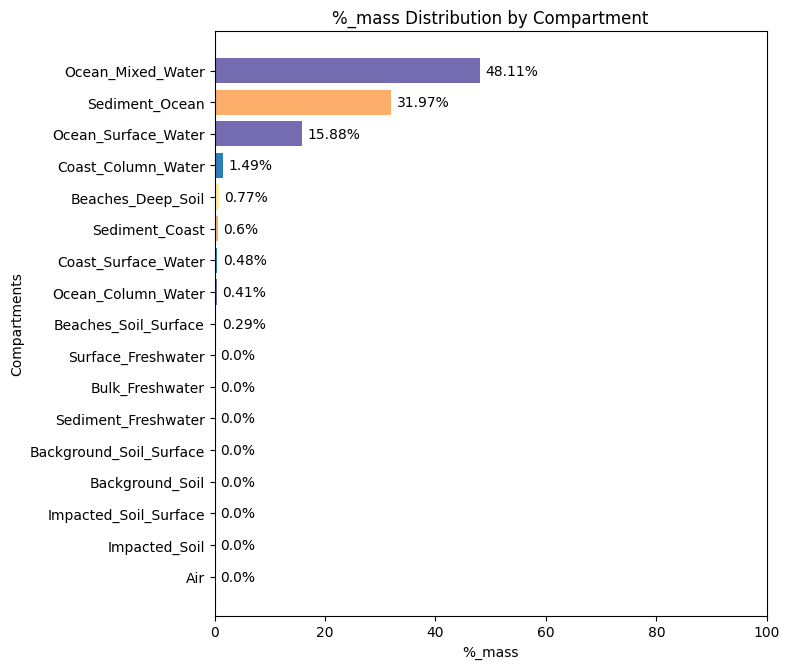

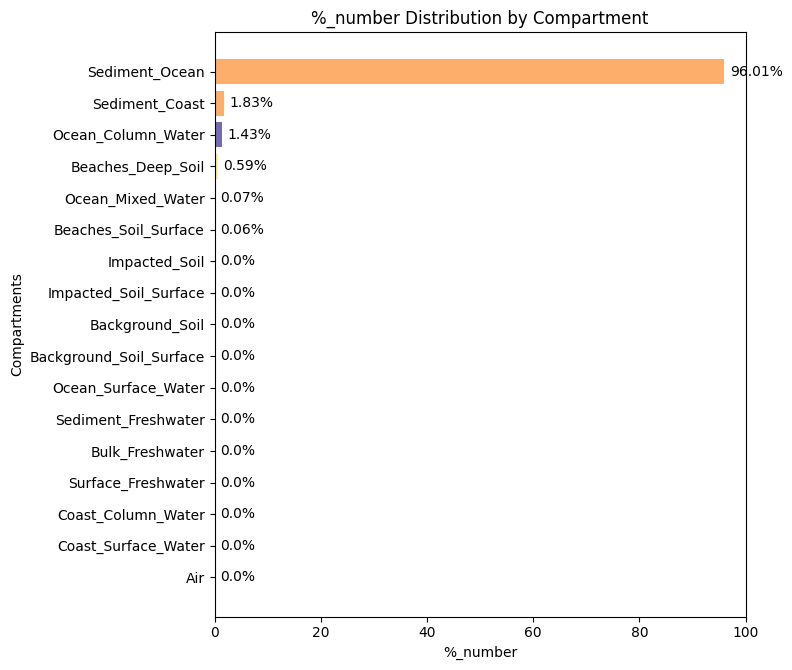

,Compartments,mass_g,number_of_particles,%_mass,%_number,Concentration_g_m3,Concentration_num_m3,inflows_g_s,inflows_num_s,outflows_g_s,outflows_num_s,Total_inflows_g_s,Total_inflows_num_s,Total_outflows_g_s,Total_outflows_num_s
0,Ocean_Surface_Water,1.527813e+08,1.907077e+18,1.588376e+01,3.251149e-03,9.373087e-08,1.169986e+03,"{'k_rising': 357787.98660404707, 'k_mixing': 6...","{'k_rising': 93204627.85870284, 'k_mixing': 52...","{'k_discorporation': 73.61158832917216, 'k_adv...","{'k_discorporation': 93646167.72573048, 'k_adv...",421656.487720,5.269646e+15,421756.487720,5.291706e+15
1,Ocean_Mixed_Water,4.627819e+08,3.818551e+19,4.811266e+01,6.509793e-02,1.419576e-08,1.171335e+03,"{'k_settling': 0.15382695653067105, 'k_mixing'...","{'k_settling': 28093988358494.88, 'k_mixing': ...","{'k_discorporation': 22.964859300843997, 'k_ad...","{'k_discorporation': 188111733.64183304, 'k_ad...",421681.503289,5.291929e+15,421681.503289,5.298351e+15
2,Ocean_Column_Water,3.932801e+06,8.361468e+20,4.088698e-01,1.425447e+00,3.002139e-12,6.382800e+02,"{'k_settling': 0.1551916814488234, 'k_mixing':...","{'k_settling': 28214624548420.242, 'k_mixing':...","{'k_discorporation': 0.0004462941035092477, 'k...","{'k_discorporation': 7960671616.699603, 'k_adv...",0.304829,2.878990e+13,0.304829,2.879040e+13
3,Coast_Surface_Water,4.596383e+06,4.417971e+16,4.778584e-01,7.531672e-05,6.850049e-08,6.584159e+02,"{'k_advective_transport': 6.289341388067585, '...","{'k_advective_transport': 78506194065.78656, '...","{'k_discorporation': 2.362463809480376, 'k_adv...","{'k_discorporation': 1948429.6513586084, 'k_ad...",25341.340501,2.441258e+14,25341.340501,2.447331e+14
4,Coast_Column_Water,1.430061e+07,8.841458e+17,1.486749e+00,1.507275e-03,1.067210e-08,6.598103e+02,"{'k_advective_transport': 6.345507009113413, '...","{'k_advective_transport': 523587824492.43823, ...","{'k_discorporation': 0.7483455025421828, 'k_ad...","{'k_discorporation': 3910508.058037749, 'k_adv...",25340.574522,2.453185e+14,25340.574522,2.455022e+14
5,Surface_Freshwater,6.637549e+00,9.379147e+12,6.900661e-07,1.598939e-08,7.334308e-13,1.036370e+00,"{'k_rising': 0.026283247720836574, 'k_mixing':...","{'k_rising': 7.349200024507947, 'k_mixing': 62...","{'k_discorporation': 3.4628620955330062e-06, '...","{'k_discorporation': 165.63829414480372, 'k_ad...",0.044477,6.314316e+10,0.044477,6.314399e+10
6,Bulk_Freshwater,2.714405e+01,9.378927e+13,2.822004e-06,1.598901e-07,2.999343e-13,1.036346e+00,"{'k_settling': 1.6313283191347698e-06, 'k_mixi...","{'k_settling': 303586025.81091607, 'k_mixing':...","{'k_discorporation': 1.4477914384443844e-06, '...","{'k_discorporation': 166.08024710409723, 'k_ad...",0.044473,6.314396e+10,0.044473,6.314428e+10
7,Sediment_Freshwater,6.179598e-01,9.378904e+13,6.424557e-08,1.598898e-07,6.828285e-13,1.036343e+02,{'k_settling': 1.6459276147621151e-06},{'k_settling': 304246728.7854694},"{'k_discorporation': 1.502050645171411e-13, 'k...","{'k_discorporation': 16.607985872355453, 'k_se...",0.000002,3.042467e+08,0.000002,3.042467e+08
8,Sediment_Ocean,3.074750e+08,5.631845e+22,3.196633e+01,9.601061e+01,3.140704e-05,5.752650e+09,{'k_settling': 0.15824376138492602},{'k_settling': 28775853455884.105},"{'k_discorporation': 0.0014315346900156422, 'k...","{'k_discorporation': 56819685321.59199, 'k_sed...",0.158244,2.877585e+13,0.158244,2.877923e+13
9,Sediment_Coast,5.774351e+06,1.074617e+21,6.003246e-01,1.831987e+00,2.154609e-06,4.009766e+08,{'k_settling': 0.006376968881524532},{'k_settling': 1183011128184.3955},"{'k_discorporation': 2.518299516829787e-05, 'k...","{'k_discorporation': 991656682.939263, 'k_sedi...",0.006377,1.183011e+12,0.006377,1.183071e+12


In [14]:
processor.extract_results_by_compartment()
for fraction in ["%_mass", "%_number"]:
    processor.plot_compartment_distribution(fraction)
processor.results_by_comp



Normalized size distribution of particle mass concentrations across compartments 

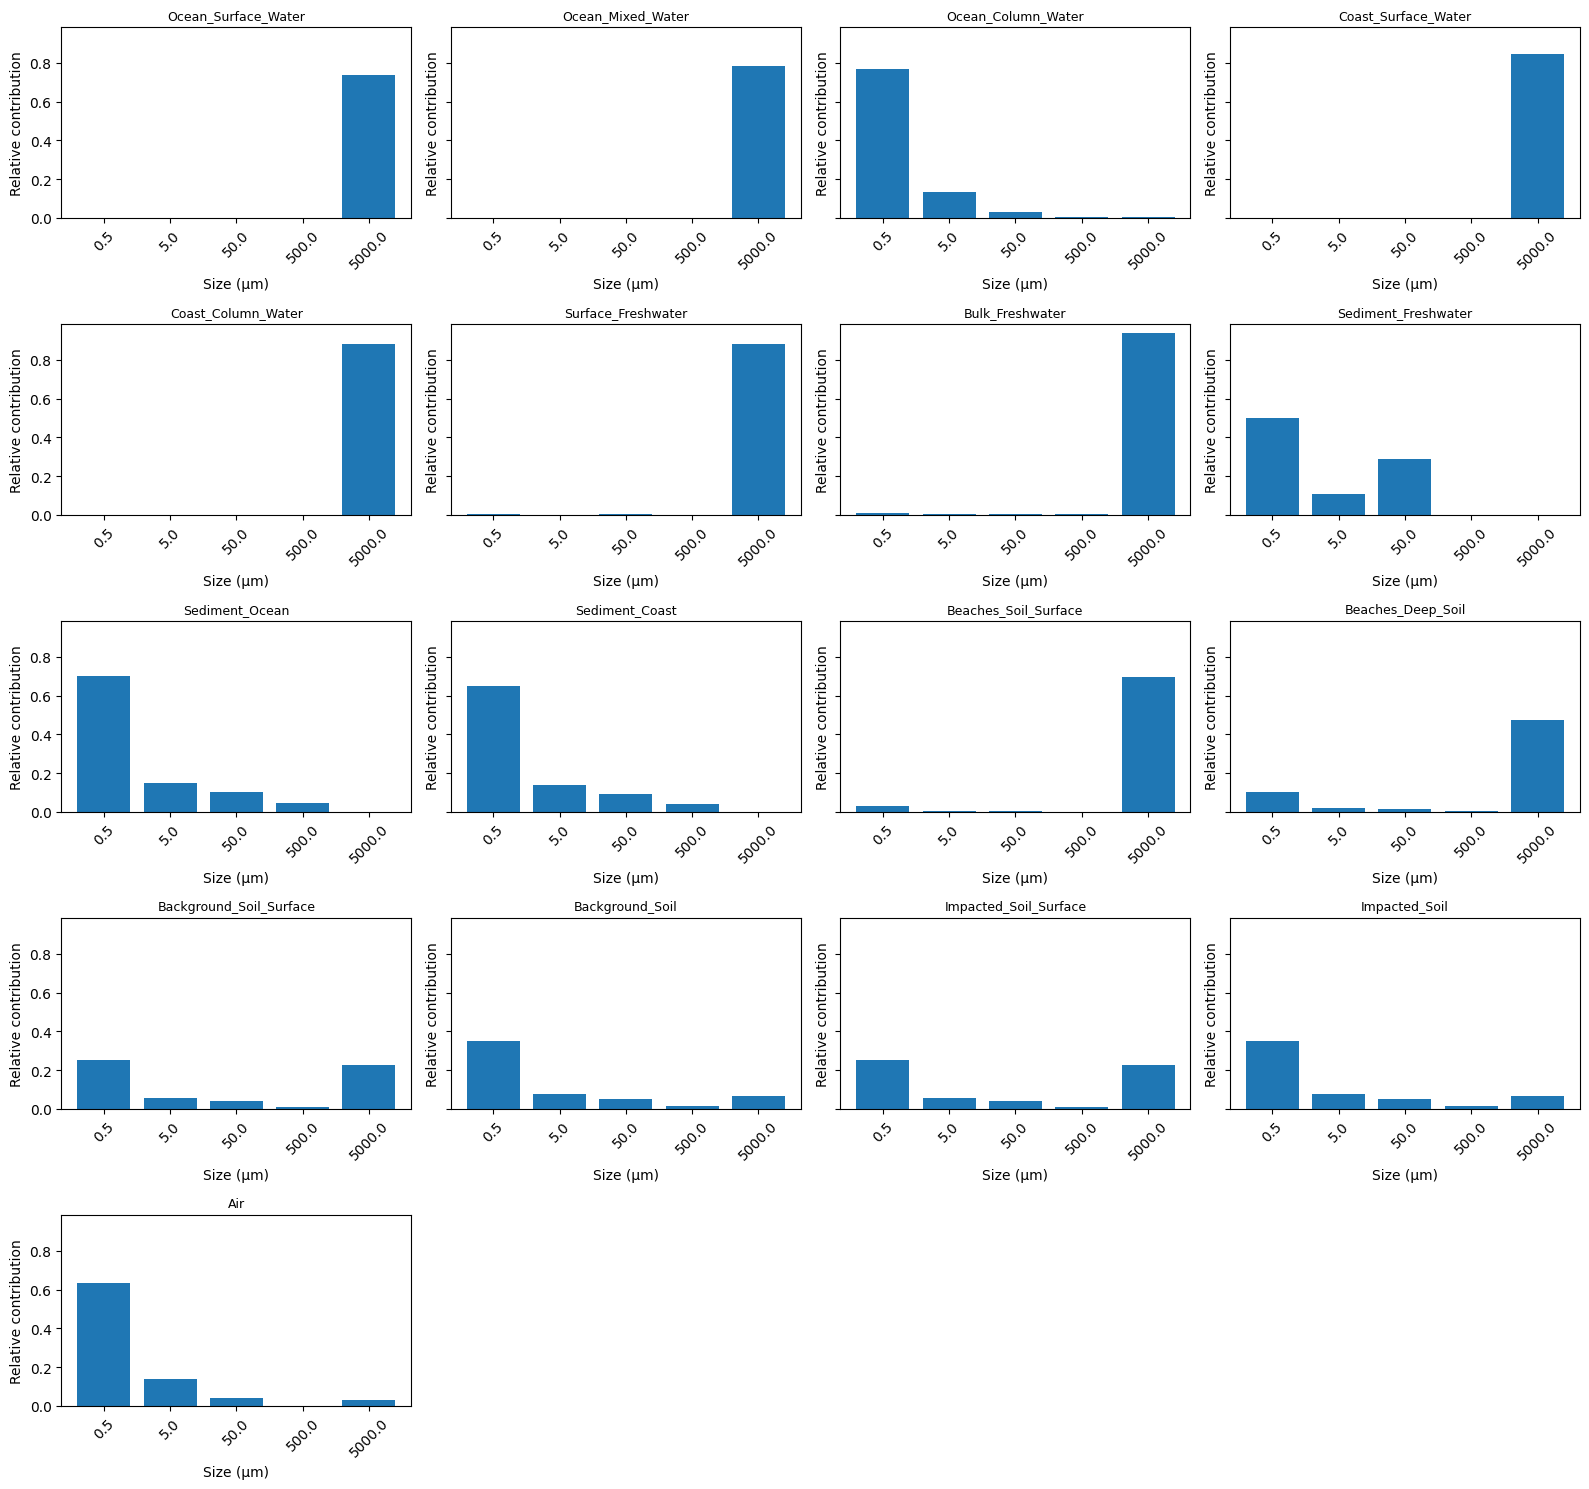

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Example: your dataframe is called df
df = processor.Results_extended
# First normalize concentrations within each compartment
df_norm = df.copy()
df_norm["normalized_conc"] = df_norm.groupby("Compartment")["concentration_g_m3"].transform(
    lambda x: x / x.sum()
)

# Get all compartments
compartments = df_norm["Compartment"].unique()
n_compartments = len(compartments)

# Choose subplot grid size (approx. square)
ncols = 4
nrows = math.ceil(n_compartments / ncols)

# Plot
fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows), sharey=True)

for ax, comp in zip(axes.flat, compartments):
    subset = df_norm[df_norm["Compartment"] == comp].sort_values("Size_Fraction_um")
    ax.bar(subset["Size_Fraction_um"].astype(str), subset["normalized_conc"])
    ax.set_title(comp, fontsize=9)
    ax.set_xlabel("Size (µm)")
    ax.set_ylabel("Relative contribution")
    ax.tick_params(axis="x", rotation=45)

# Remove empty subplots if any
for ax in axes.flat[n_compartments:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


Normalized size distribution of particle number concentrations across compartments 

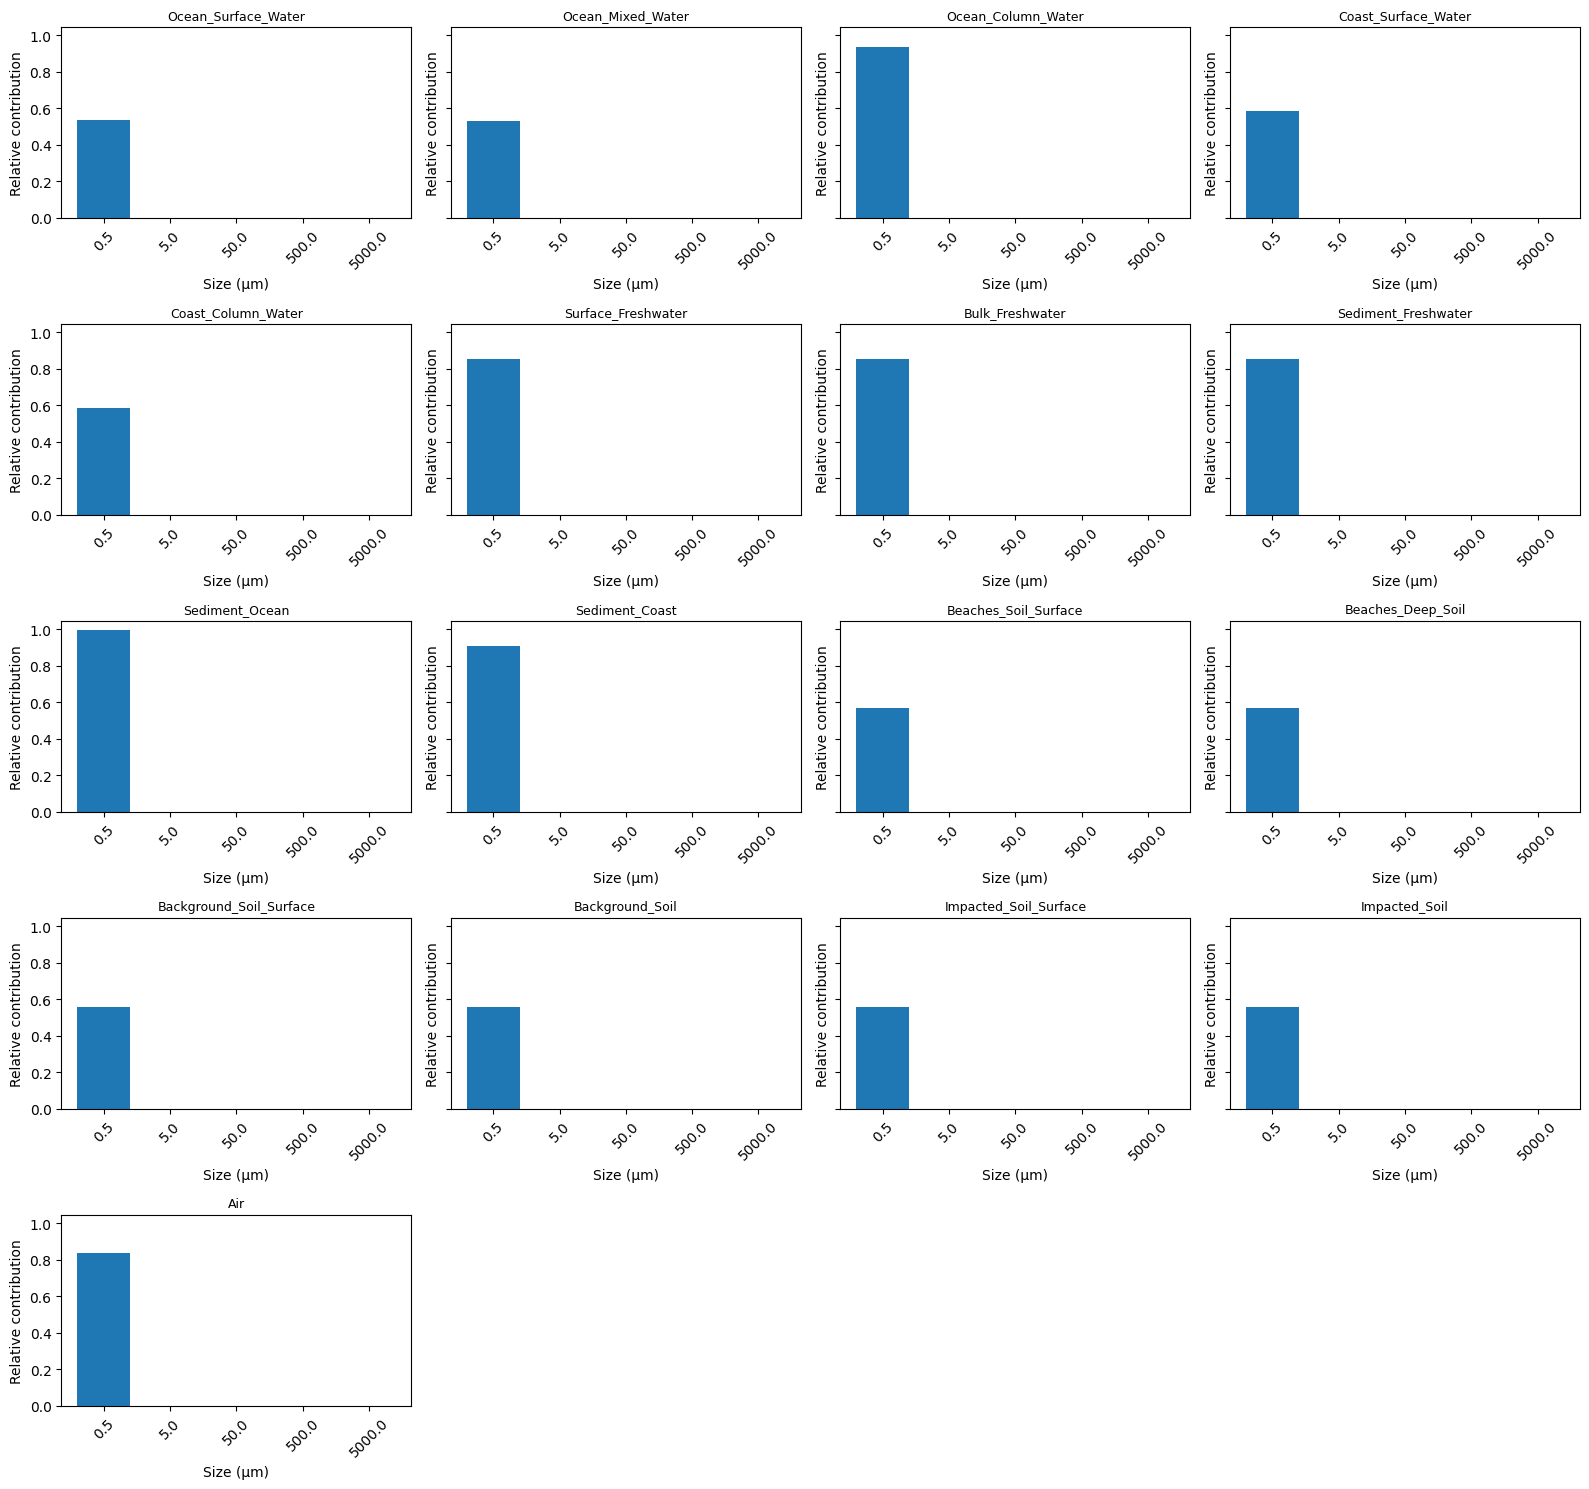

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Example: your dataframe is called df
df = processor.Results_extended
# First normalize concentrations within each compartment
df_norm = df.copy()
df_norm["normalized_conc"] = df_norm.groupby("Compartment")["concentration_num_m3"].transform(
    lambda x: x / x.sum()
)

# Get all compartments
compartments = df_norm["Compartment"].unique()
n_compartments = len(compartments)

# Choose subplot grid size (approx. square)
ncols = 4
nrows = math.ceil(n_compartments / ncols)

# Plot
fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows), sharey=True)

for ax, comp in zip(axes.flat, compartments):
    subset = df_norm[df_norm["Compartment"] == comp].sort_values("Size_Fraction_um")
    ax.bar(subset["Size_Fraction_um"].astype(str), subset["normalized_conc"])
    ax.set_title(comp, fontsize=9)
    ax.set_xlabel("Size (µm)")
    ax.set_ylabel("Relative contribution")
    ax.tick_params(axis="x", rotation=45)

# Remove empty subplots if any
for ax in axes.flat[n_compartments:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

#### Mass balance by compartment


In [17]:
for i in range(len(processor.results_by_comp)):
    emissions=sum(processor.model.emiss_dict_g_s[processor.results_by_comp['Compartments'].iloc[i]].values())
    print(f"Mass balance for {processor.results_by_comp['Compartments'].iloc[i]}: {processor.results_by_comp['Total_inflows_g_s'].iloc[i]+emissions-processor.results_by_comp['Total_outflows_g_s'].iloc[i]}")

Mass balance for Ocean_Surface_Water: 5.820766091346741e-11
Mass balance for Ocean_Mixed_Water: -5.820766091346741e-11
Mass balance for Ocean_Column_Water: -1.1102230246251565e-16
Mass balance for Coast_Surface_Water: 0.0
Mass balance for Coast_Column_Water: 3.637978807091713e-12
Mass balance for Surface_Freshwater: -6.938893903907228e-18
Mass balance for Bulk_Freshwater: 0.0
Mass balance for Sediment_Freshwater: -2.117582368135751e-22
Mass balance for Sediment_Ocean: 0.0
Mass balance for Sediment_Coast: -1.734723475976807e-18
Mass balance for Beaches_Soil_Surface: -2.7755575615628914e-17
Mass balance for Beaches_Deep_Soil: 6.938893903907228e-18
Mass balance for Background_Soil_Surface: 0.0
Mass balance for Background_Soil: 3.3881317890172014e-21
Mass balance for Impacted_Soil_Surface: 0.0
Mass balance for Impacted_Soil: 3.3881317890172014e-21
Mass balance for Air: 1.0842021724855044e-19


#### Exposure Indicators

In [18]:
# Calculate exposure indicators
processor.estimate_exposure_indicators()

##### Persistence and Residence Time

In [19]:
processor.processed_results["Overall_exposure_indicators"]

,Overall exposure indicators,Overall persistence (years),Overall residence time (years)
0,Mass,0.206595,0.206209
1,Number,27983.613800,1.628155


In [20]:
processor.processed_results["size_fraction_indicators"]


,Size (um),Pov (years),Tov (years)
0,0.5,27984.784311,1.626614
1,5.0,21403.328833,1.594630
2,50.0,7105.365333,1.494796
3,500.0,351.506902,1.201757
4,5000.0,0.203704,0.203703


##### Dispersed mass fraction (φ1) and remotely transferred mass fraction (φ2)

Environmentally Dispersed Mass Fractions through Air = 1.4691086105551274e-11
Environmentally Dispersed Mass Fractions through Ocean_Mixed_Water = 3.800660375408466e-05
Environmentally Dispersed Mass Fractions through Ocean_Surface_Water = 7.535961857562278e-07
φ1 for mass = 3.876021463092699e-05
Remotely transferred fraction to Ocean_Surface_Water = 2.8531199867950432e-05
Remotely transferred fraction to Ocean_Column_Water = 1.7299390100704317e-10
Remotely transferred fraction to Sediment_Ocean = 5.54820707997685e-10
Remotely transferred fraction to Beaches_Soil_Surface = 4.868223036886422e-08
Total remotely transferred mass fraction = 2.8580609912928302e-05


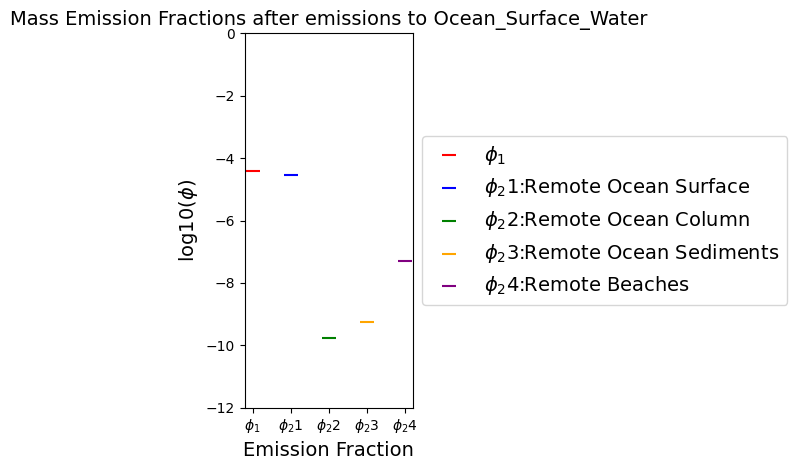

In [21]:
processor.estimate_emission_fractions()

In [22]:
pd.DataFrame(processor.processed_results["emission_fractions_mass_data"])

,Emission Fraction,y
0,φ1,3.876021e-05
1,φ2_1,2.853120e-05
2,φ2_2,1.729939e-10
3,φ2_3,5.548207e-10
4,φ2_4,4.868223e-08


In [23]:
## Alternativelly to runing step by step one can run all functions at the same time and then acess specific reutls from the processed_results dictionary

#processor.process_all()  # Process all results

In [24]:
#pd.DataFrame(processor.processed_results["emission_fractions_mass_data"])


#### Step 5: Advanced Configuration (Optional)



##### To adjust some input parameters the user can modify the values given in the default conf_data or data_data json files manually by modifying the json file provided in the data folder and saving it under a new name to then load it using the load_json_file function as provided above or following the comands provided below:


In [25]:
# Define modifications (follow the structure providede in the default configuration data (data_data))
modifications = {
    "MPdensity_kg_m3": 1580,
    "MP_composition": "PVC",
    'FI': 0.5
}

# Modify and save the data
model.modify_and_save_data(data_data, modifications, "custom_data.json")

Modified data saved to C:\XiaoyuGithub\UTOPIA\UTOPIA_package\src\utopia\data\custom_data.json


In [26]:
# Load the modified data to check if the changes were applied correctly
user_data = utopiaModel.load_json_file("data/custom_data.json")
Newmodel = utopiaModel(config=config_data, data=user_data)
Newmodel.summarize()

Model: UTOPIA
Microplastic Density (kg/m3): 1580
MP shape:  fiber
Emissions made to MP form:  freeMP
Fragmentation style: Mixed (F = 0.5)
Fragmetation timescale (days):  36.5
Discorporation timescale (days):  4584
Emissions to Ocean_Surface_Water for size fraction 5000.0 µm: 100 g/s


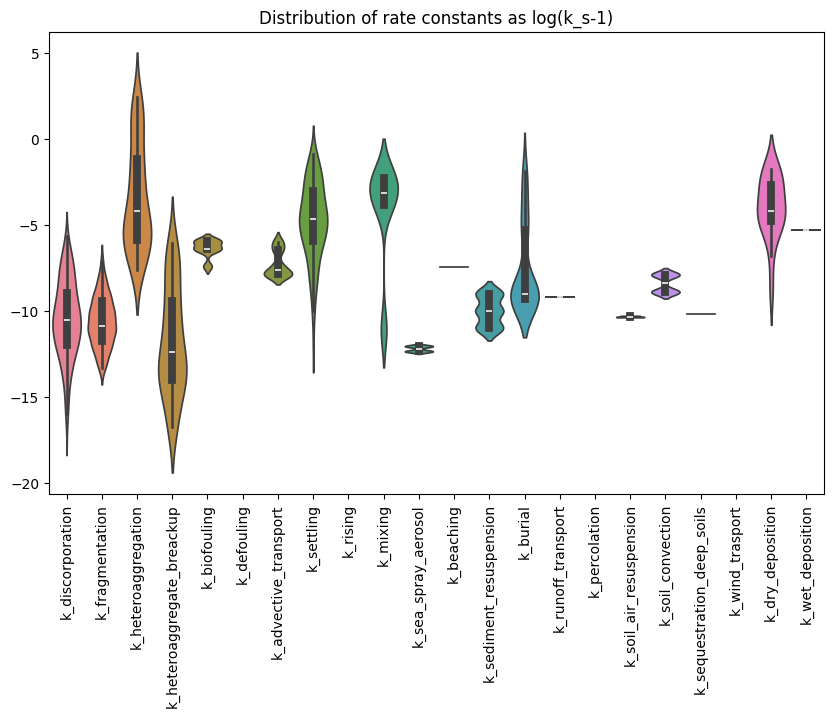

<Figure size 640x480 with 0 Axes>

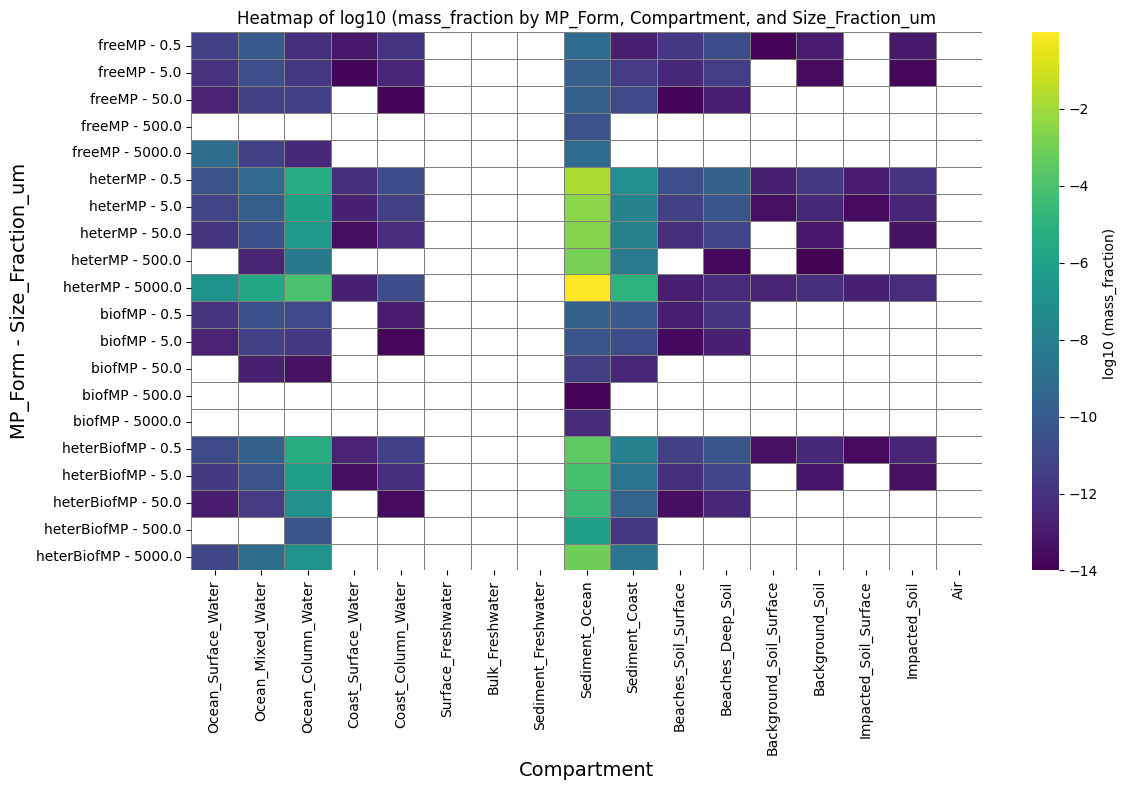

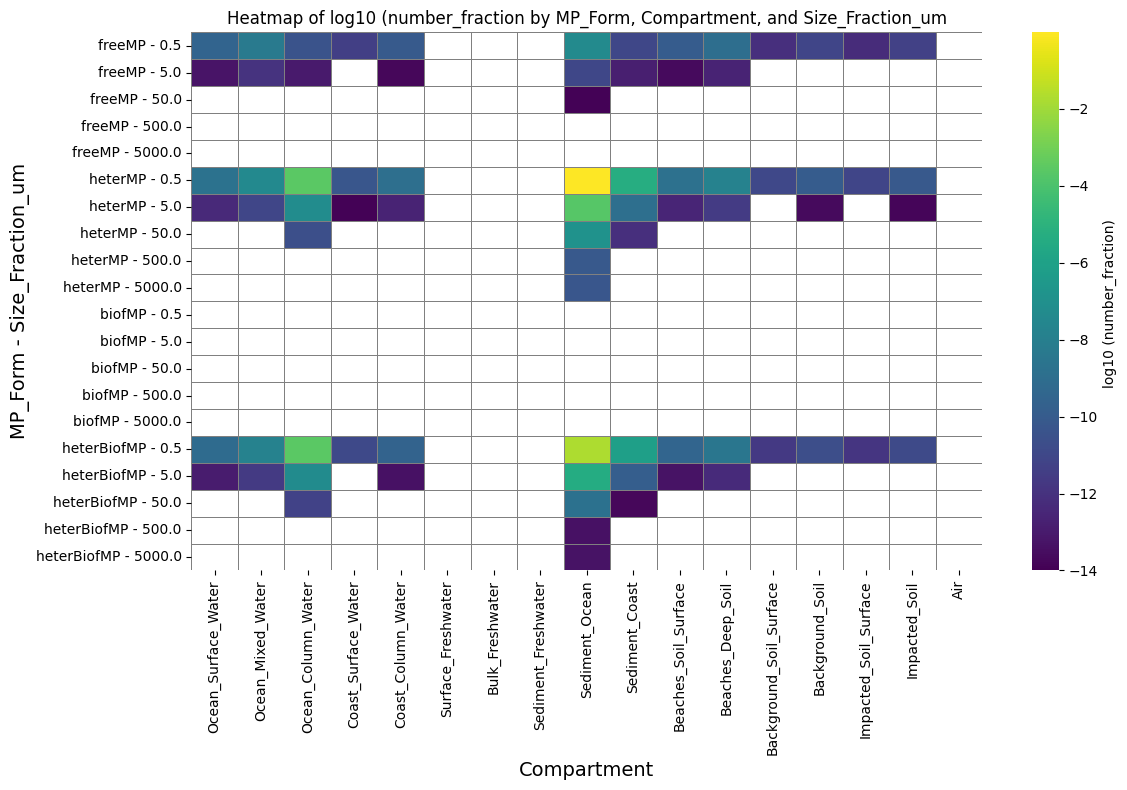

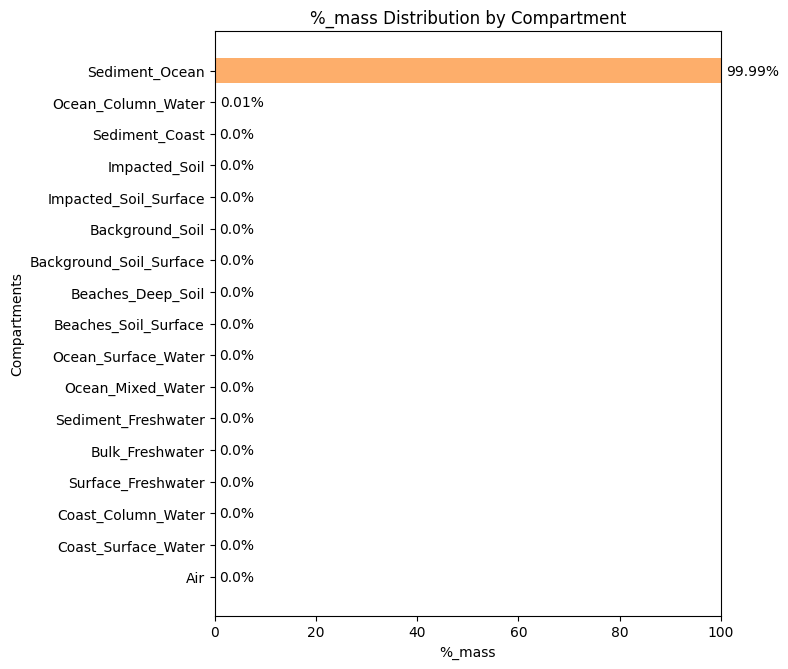

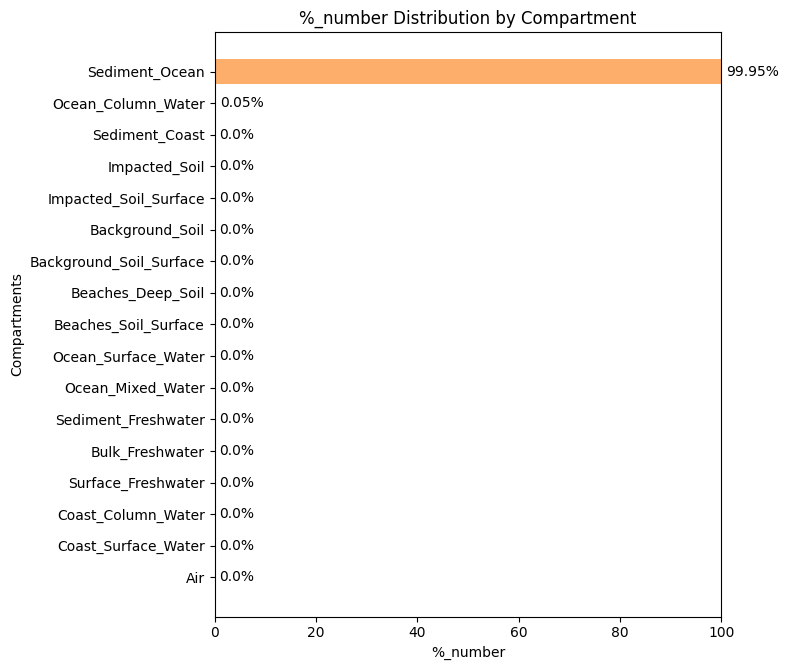

Environmentally Dispersed Mass Fractions through Air = 1.739976412057162e-16
Environmentally Dispersed Mass Fractions through Ocean_Mixed_Water = 6.482197922068384e-09
Environmentally Dispersed Mass Fractions through Ocean_Surface_Water = 1.9500648653211036e-11
φ1 for mass = 6.501698744719236e-09
Remotely transferred fraction to Ocean_Surface_Water = 6.947616897259018e-15
Remotely transferred fraction to Ocean_Column_Water = 5.5248521761606655e-12
Remotely transferred fraction to Sediment_Ocean = 5.4548429725515775e-09
Remotely transferred fraction to Beaches_Soil_Surface = 4.092242424248576e-21
Total remotely transferred mass fraction = 5.460374772348728e-09


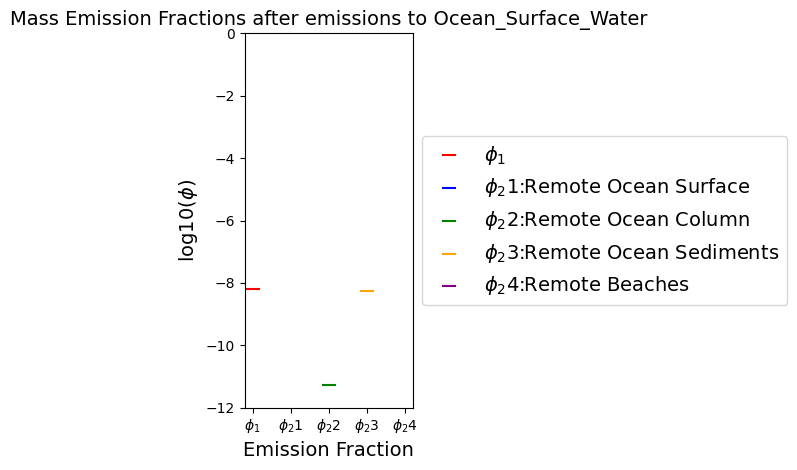

In [27]:
Newmodel.run()  # Run the model to estimate steady state solution for the system.
# Process results   
# Process results
processorNew = ResultsProcessor(Newmodel)  # Pass model with results
processorNew.process_all()  # Process all results


In [28]:
pd.DataFrame(processorNew.processed_results["emission_fractions_mass_data"])

,Emission Fraction,y
0,φ1,6.501699e-09
1,φ2_1,6.947617e-15
2,φ2_2,5.524852e-12
3,φ2_3,5.454843e-09
4,φ2_4,4.092242e-21


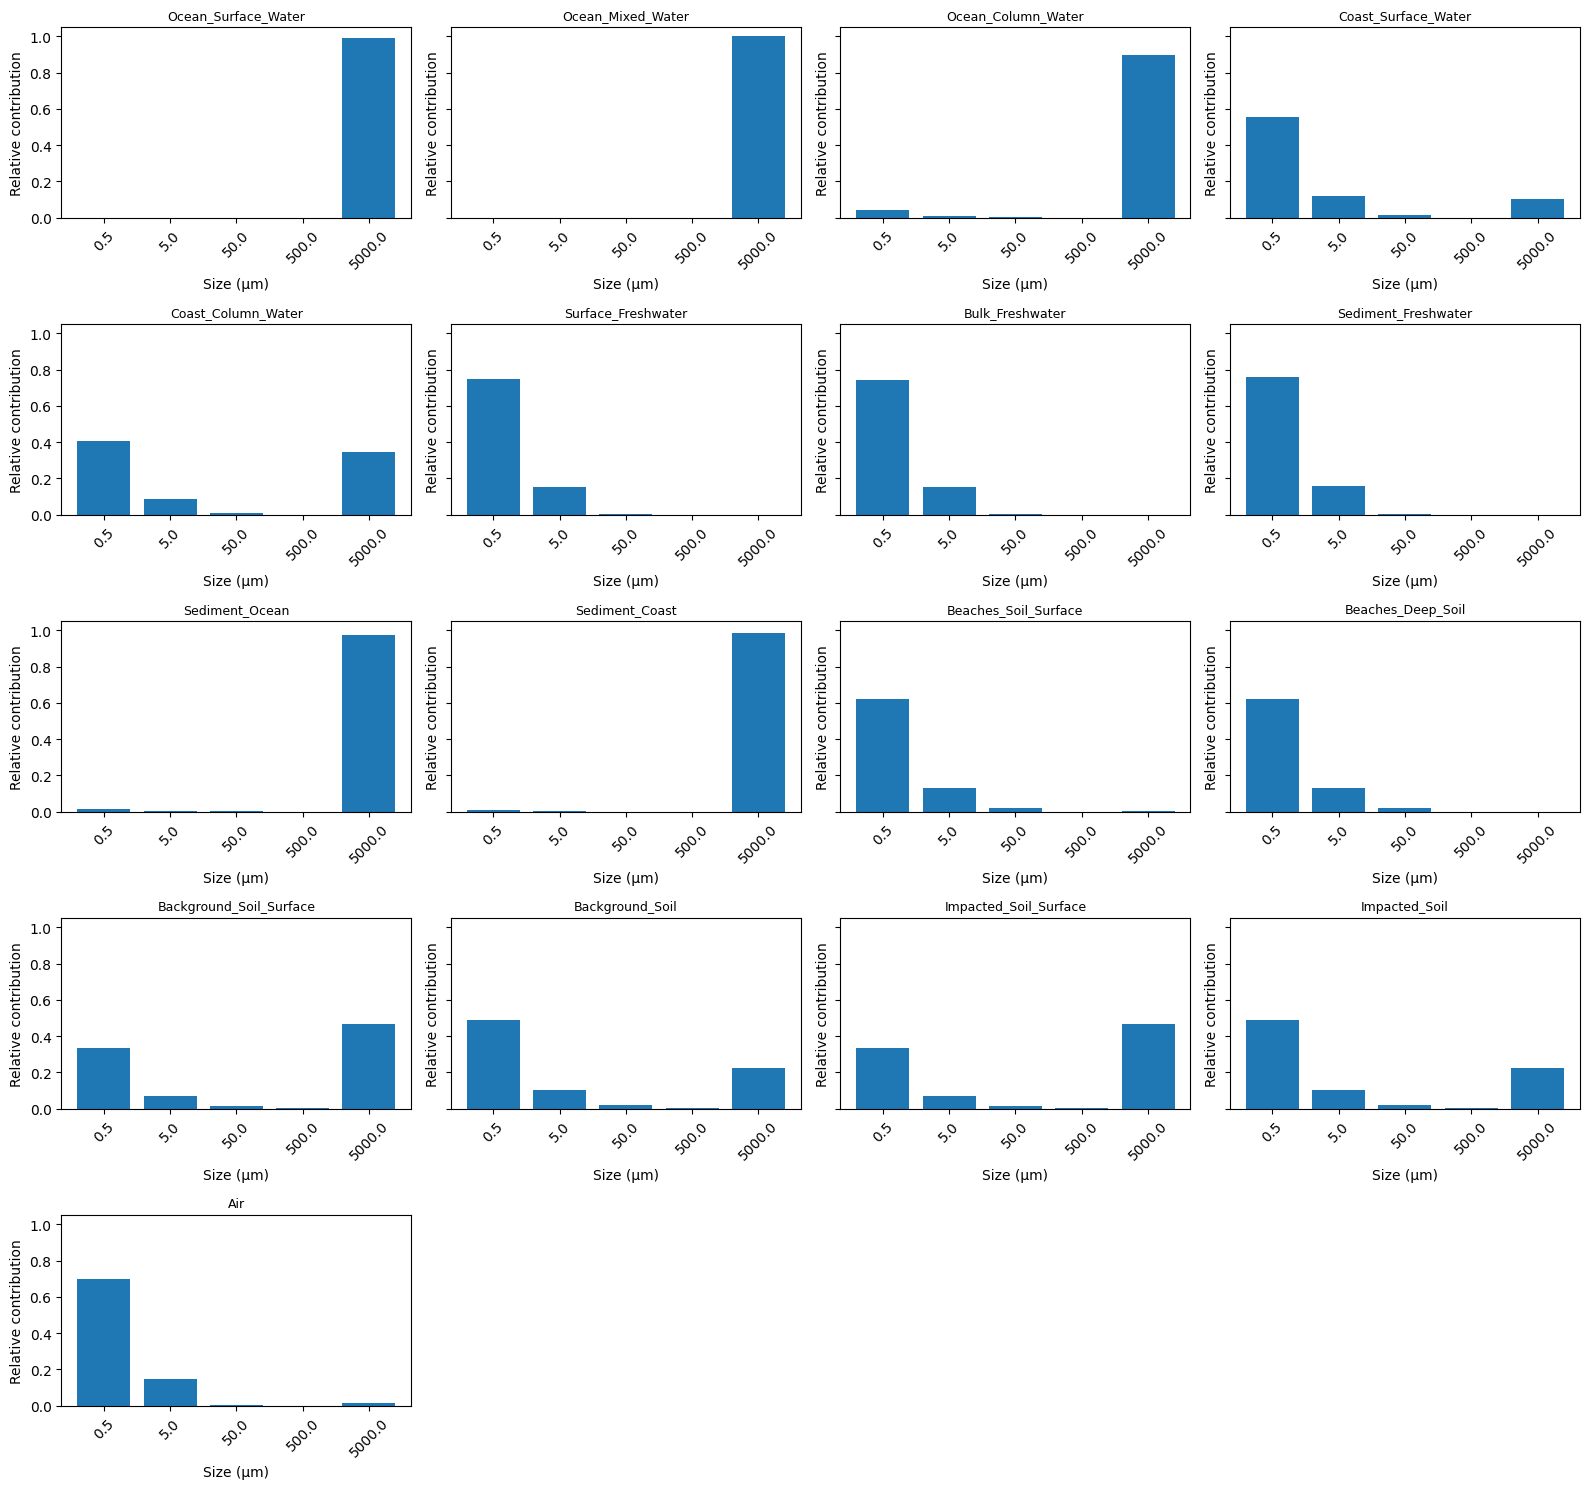

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Example: your dataframe is called df
df = processorNew.Results_extended
# First normalize concentrations within each compartment
df_norm = df.copy()
df_norm["normalized_conc"] = df_norm.groupby("Compartment")["concentration_g_m3"].transform(
    lambda x: x / x.sum()
)

# Get all compartments
compartments = df_norm["Compartment"].unique()
n_compartments = len(compartments)

# Choose subplot grid size (approx. square)
ncols = 4
nrows = math.ceil(n_compartments / ncols)

# Plot
fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows), sharey=True)

for ax, comp in zip(axes.flat, compartments):
    subset = df_norm[df_norm["Compartment"] == comp].sort_values("Size_Fraction_um")
    ax.bar(subset["Size_Fraction_um"].astype(str), subset["normalized_conc"])
    ax.set_title(comp, fontsize=9)
    ax.set_xlabel("Size (µm)")
    ax.set_ylabel("Relative contribution")
    ax.tick_params(axis="x", rotation=45)

# Remove empty subplots if any
for ax in axes.flat[n_compartments:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


### Step 7: Saving the Model Output (Optional)

If you want to save the results follow the commands below (under developement) 


In [30]:

# output_file = "model_output.json"
# with open(output_file, "w") as file:
#     json.dump(results, file)
# print(f"Results saved to {output_file}")
